# Segment Anything Model: automatic mask generation using `transformers` 🤗 library

This notebook demonstrates how to use the Segment Anything Model (SAM) to automatically generate segementation masks on any image. The model was released by Meta AI in the paper [Segment Anything Model](https://ai.facebook.com/research/publications/segment-anything/). The original source code can be found [here](https://github.com/facebookresearch/segment-anything)

The `mask-generation` pipeline, freshly released for SAM, creates a gris of `1024` which are feed in a batch of `points_per_batch` to the model. The examples are inspired from the [original notebook of the authors](https://github.com/facebookresearch/segment-anything/blob/main/notebooks/predictor_example.ipynb).


In [8]:
# !pip install -q git+https://github.com/huggingface/transformers.git

In [9]:
# To check if Torch CUDA is available
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("There are %d GPU(s) available." % torch.cuda.device_count())
    print("We will use the GPU:", torch.cuda.get_device_name(0))
else:
    print("No GPU available, using the CPU instead.")
    device = torch.device("cpu")
    
# Run this line in terminal: python -c "import torch; print(torch.rand(2,3).cuda())"

There are 1 GPU(s) available.
We will use the GPU: NVIDIA GeForce GTX 1650


## Utility functions

Run the cells below to import the needed utility functions for displaying the masks!

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import gc

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30 / 255, 144 / 255, 255 / 255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    del mask
    gc.collect()

def show_masks_on_image(raw_image, masks):
  plt.imshow(np.array(raw_image))
  ax = plt.gca()
  ax.set_autoscale_on(False)
  for mask in masks:
      show_mask(mask, ax=ax, random_color=True)
  plt.axis("off")
  plt.show()
  del mask
  gc.collect()

## Model loading

Use the `from_pretrained` method on the `SamForMaskGeneration` class to load the model from the Hub! For the sake of this demonstration we will use the `vit-huge` checkpoint.

In [11]:
from transformers import pipeline
generator = pipeline("mask-generation", model="facebook/sam-vit-huge", device=0)

### Load the example image

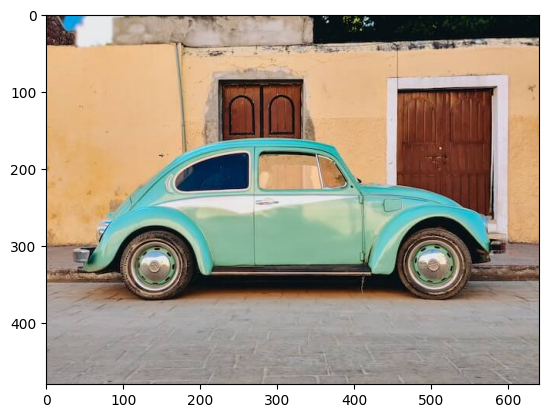

In [12]:
from PIL import Image
import requests

img_url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/car.jpg"
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert("RGB")

plt.imshow(raw_image)

# Generate the masks


Let's automatically generate the masks on the image! For that simply pass the raw image into the generator 

In [13]:
outputs = generator(raw_image, points_per_batch=64)

NameError: name 'batched_nms' is not defined

The line above you take ~7 seconds on Google Colab 1xNVIDIA-T4, now let's see the resulting segmentation masks.

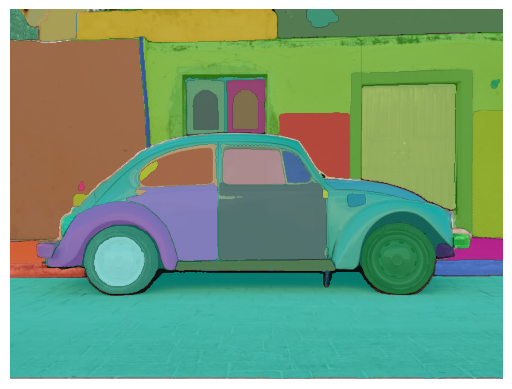

In [ ]:
masks = outputs["masks"]
show_masks_on_image(raw_image, masks)

# Batch of images
You can feed both urls and raw images. Here is an example:

In [ ]:
new_image_url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/depth-estimation-example.jpg"
outputs = generator([raw_image,new_image_url], points_per_batch=64)

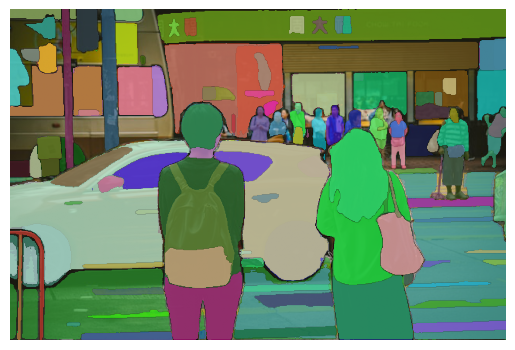

In [ ]:
masks = outputs[1]["masks"]
raw_image = Image.open(requests.get(new_image_url, stream=True).raw).convert("RGB")
show_masks_on_image(raw_image, masks)